### NSRB Solar Data Machine Learning Project

### Energy Generation Data

In [15]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression         
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [16]:
# reading the csv
df = pd.read_csv('ercot_solar.csv')

In [17]:
# preview the data
df.head()

,timestamp,solar_system,solar_centerwest,solar_northwest,solar_farwest,solar_fareast,solar_southeast,solar_centereast
0,2022-06-29 01:00:00,0.20,0.0,0.0,0.0,0.1,0.0,0.10
1,2022-06-29 02:00:00,0.19,0.0,0.0,0.0,0.1,0.0,0.09
2,2022-06-29 03:00:00,0.10,0.0,0.0,0.0,0.1,0.0,0.00
3,2022-06-29 04:00:00,0.10,0.0,0.0,0.0,0.1,0.0,0.00
4,2022-06-29 05:00:00,0.10,0.0,0.0,0.0,0.1,0.0,0.00


In [18]:
# descriptive stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12743 entries, 0 to 12742
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         12743 non-null  object 
 1   solar_system      12739 non-null  float64
 2   solar_centerwest  12739 non-null  float64
 3   solar_northwest   12739 non-null  float64
 4   solar_farwest     12739 non-null  float64
 5   solar_fareast     12739 non-null  float64
 6   solar_southeast   12739 non-null  float64
 7   solar_centereast  12739 non-null  float64
dtypes: float64(7), object(1)
memory usage: 796.6+ KB


In [19]:
### Data Cleaning

In [20]:
# changing timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12743 entries, 0 to 12742
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         12743 non-null  datetime64[ns]
 1   solar_system      12739 non-null  float64       
 2   solar_centerwest  12739 non-null  float64       
 3   solar_northwest   12739 non-null  float64       
 4   solar_farwest     12739 non-null  float64       
 5   solar_fareast     12739 non-null  float64       
 6   solar_southeast   12739 non-null  float64       
 7   solar_centereast  12739 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 796.6 KB


In [21]:
# general stats
df.describe()

,timestamp,solar_system,solar_centerwest,solar_northwest,solar_farwest,solar_fareast,solar_southeast,solar_centereast
count,12743,12739.000000,12739.000000,12739.000000,12739.000000,12739.000000,12739.000000,12739.000000
mean,2023-04-07 06:25:24.130895616,3441.211389,628.069239,119.806256,1216.796427,932.071108,225.620721,318.847640
min,2022-06-29 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-11-13 18:30:00,0.260000,0.000000,0.000000,0.010000,0.170000,0.000000,0.020000
50%,2023-04-14 12:00:00,237.300000,24.070000,3.420000,61.650000,33.060000,8.330000,11.770000
75%,2023-08-21 05:30:00,7333.030000,1378.290000,254.245000,2748.620000,1865.445000,484.840000,557.695000
max,2023-12-31 23:00:00,17893.340000,3581.420000,827.200000,4426.930000,5611.480000,1654.630000,2379.260000
std,NaN,4310.458397,814.274688,167.970070,1544.694694,1249.438518,292.576063,437.889514


In [22]:
# checking for null values
df.isnull().sum()

timestamp           0
solar_system        4
solar_centerwest    4
solar_northwest     4
solar_farwest       4
solar_fareast       4
solar_southeast     4
solar_centereast    4
dtype: int64

In [23]:
# dropping null values
df.dropna()

,timestamp,solar_system,solar_centerwest,solar_northwest,solar_farwest,solar_fareast,solar_southeast,solar_centereast
0,2022-06-29 01:00:00,0.20,0.0,0.0,0.00,0.10,0.0,0.10
1,2022-06-29 02:00:00,0.19,0.0,0.0,0.00,0.10,0.0,0.09
2,2022-06-29 03:00:00,0.10,0.0,0.0,0.00,0.10,0.0,0.00
3,2022-06-29 04:00:00,0.10,0.0,0.0,0.00,0.10,0.0,0.00
4,2022-06-29 05:00:00,0.10,0.0,0.0,0.00,0.10,0.0,0.00
...,...,...,...,...,...,...,...,...
12738,2023-12-31 19:00:00,0.01,0.0,0.0,0.00,0.01,0.0,0.00
12739,2023-12-31 20:00:00,0.02,0.0,0.0,0.01,0.01,0.0,0.00
12740,2023-12-31 21:00:00,0.50,0.0,0.0,0.02,0.48,0.0,0.00
12741,2023-12-31 22:00:00,0.03,0.0,0.0,0.02,0.01,0.0,0.00


In [24]:
# checking for duplicates
df.duplicated().sum()

120

In [25]:
duplicates=df[df.duplicated]
duplicates

,timestamp,solar_system,solar_centerwest,solar_northwest,solar_farwest,solar_fareast,solar_southeast,solar_centereast
4944,2023-02-14 01:00:00,0.26,0.00,0.00,0.01,0.23,0.00,0.02
4945,2023-02-14 02:00:00,0.24,0.00,0.00,0.01,0.20,0.00,0.03
4946,2023-02-14 03:00:00,0.21,0.00,0.00,0.01,0.18,0.00,0.02
4947,2023-02-14 04:00:00,0.21,0.00,0.00,0.01,0.18,0.00,0.02
4948,2023-02-14 05:00:00,0.21,0.00,0.00,0.01,0.18,0.00,0.02
...,...,...,...,...,...,...,...,...
7552,2023-05-29 17:00:00,10149.99,1794.64,376.66,4132.85,2526.37,574.17,745.30
7553,2023-05-29 18:00:00,8592.86,1848.35,369.40,3883.15,1132.20,592.93,766.83
7554,2023-05-29 19:00:00,7292.56,1715.81,332.03,3652.19,605.30,438.68,548.55
7555,2023-05-29 20:00:00,4033.59,911.99,169.30,2388.95,223.00,112.49,227.86


In [26]:
# dropping duplicates
df.drop_duplicates()

,timestamp,solar_system,solar_centerwest,solar_northwest,solar_farwest,solar_fareast,solar_southeast,solar_centereast
0,2022-06-29 01:00:00,0.20,0.0,0.0,0.00,0.10,0.0,0.10
1,2022-06-29 02:00:00,0.19,0.0,0.0,0.00,0.10,0.0,0.09
2,2022-06-29 03:00:00,0.10,0.0,0.0,0.00,0.10,0.0,0.00
3,2022-06-29 04:00:00,0.10,0.0,0.0,0.00,0.10,0.0,0.00
4,2022-06-29 05:00:00,0.10,0.0,0.0,0.00,0.10,0.0,0.00
...,...,...,...,...,...,...,...,...
12738,2023-12-31 19:00:00,0.01,0.0,0.0,0.00,0.01,0.0,0.00
12739,2023-12-31 20:00:00,0.02,0.0,0.0,0.01,0.01,0.0,0.00
12740,2023-12-31 21:00:00,0.50,0.0,0.0,0.02,0.48,0.0,0.00
12741,2023-12-31 22:00:00,0.03,0.0,0.0,0.02,0.01,0.0,0.00


In [27]:
# saving csv to be joined with its companion using SQL
df.to_csv('solar_data_converted.csv', index=False)

### Temperature Data

In [29]:
# loading csv file
temp_df = pd.read_csv('era5_by_region.csv')

In [30]:
# preview the data
temp_df.head()

,time,number,temp_2m_south,wind_u_100m_south,wind_v_100m_south,number.1,temp_2m_north,wind_u_100m_north,wind_v_100m_north,number.2,temp_2m_east,wind_u_100m_east,wind_v_100m_east,number.3,temp_2m_west,wind_u_100m_west,wind_v_100m_west
0,2021-01-01 00:00:00,0,280.44113,8.874052,-4.125525,0,275.47700,-0.758140,-8.064275,0,285.33070,8.095841,5.828926,0,274.88324,3.239945,-4.025888
1,2021-01-01 01:00:00,0,280.06485,8.833785,-4.142875,0,275.49615,-0.381892,-7.454720,0,284.06274,9.073054,5.087430,0,274.58267,3.051376,-3.864054
2,2021-01-01 02:00:00,0,279.50992,8.720156,-3.938205,0,275.44696,0.146601,-6.802784,0,282.77908,8.665540,4.598661,0,273.86377,2.987516,-3.852034
3,2021-01-01 03:00:00,0,278.65192,8.357309,-3.723078,0,275.24594,0.887693,-6.319172,0,281.25110,7.918151,4.829106,0,273.21588,2.977859,-3.923165
4,2021-01-01 04:00:00,0,278.41907,8.048112,-3.574828,0,275.12744,1.753668,-5.496035,0,280.96722,8.195437,5.092289,0,272.90448,3.114550,-3.790921


In [31]:
# general stats
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               26280 non-null  object 
 1   number             26280 non-null  int64  
 2   temp_2m_south      26280 non-null  float64
 3   wind_u_100m_south  26280 non-null  float64
 4   wind_v_100m_south  26280 non-null  float64
 5   number.1           26280 non-null  int64  
 6   temp_2m_north      26280 non-null  float64
 7   wind_u_100m_north  26280 non-null  float64
 8   wind_v_100m_north  26280 non-null  float64
 9   number.2           26280 non-null  int64  
 10  temp_2m_east       26280 non-null  float64
 11  wind_u_100m_east   26280 non-null  float64
 12  wind_v_100m_east   26280 non-null  float64
 13  number.3           26280 non-null  int64  
 14  temp_2m_west       26280 non-null  float64
 15  wind_u_100m_west   26280 non-null  float64
 16  wind_v_100m_west   262

In [32]:
# checking for dupicates and null values
print (f'Number of duplicates: {temp_df.duplicated().sum()}')
print (f'Number of null values: {temp_df.isnull().sum()}')

Number of duplicates: 0
Number of null values: time                 0
number               0
temp_2m_south        0
wind_u_100m_south    0
wind_v_100m_south    0
number.1             0
temp_2m_north        0
wind_u_100m_north    0
wind_v_100m_north    0
number.2             0
temp_2m_east         0
wind_u_100m_east     0
wind_v_100m_east     0
number.3             0
temp_2m_west         0
wind_u_100m_west     0
wind_v_100m_west     0
dtype: int64


In [33]:
# keeping only time and temperature columns
columns_to_drop = ['number', 'wind_u_100m_south', 'wind_v_100m_south', 'number.1', 'wind_u_100m_north', 'wind_v_100m_north', 'number.2', 'wind_u_100m_east', 'wind_v_100m_east', 'number.3', 'wind_u_100m_west', 'wind_v_100m_west']
temp_df_dropped = temp_df.drop(columns=columns_to_drop, axis=1)

In [34]:
# converting time to datetime format
temp_df_dropped['time'] = pd.to_datetime(temp_df_dropped['time'])
temp_df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           26280 non-null  datetime64[ns]
 1   temp_2m_south  26280 non-null  float64       
 2   temp_2m_north  26280 non-null  float64       
 3   temp_2m_east   26280 non-null  float64       
 4   temp_2m_west   26280 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.0 MB


In [35]:
# List of temperature columns to convert
temp_columns = ['temp_2m_south', 'temp_2m_north', 'temp_2m_east', 'temp_2m_west']

# Convert from kelvin to celsius
temp_df_dropped[temp_columns] = temp_df_dropped[temp_columns] - 273.15

In [36]:
temp_df_dropped.head()

,time,temp_2m_south,temp_2m_north,temp_2m_east,temp_2m_west
0,2021-01-01 00:00:00,7.29113,2.32700,12.18070,1.73324
1,2021-01-01 01:00:00,6.91485,2.34615,10.91274,1.43267
2,2021-01-01 02:00:00,6.35992,2.29696,9.62908,0.71377
3,2021-01-01 03:00:00,5.50192,2.09594,8.10110,0.06588
4,2021-01-01 04:00:00,5.26907,1.97744,7.81722,-0.24552


In [37]:
# converting from celcius to fahrenheit
temp_df_dropped[temp_columns] = (temp_df_dropped[temp_columns] * 9/5) + 32
temp_df_dropped.head()

,time,temp_2m_south,temp_2m_north,temp_2m_east,temp_2m_west
0,2021-01-01 00:00:00,45.124034,36.188600,53.925260,35.119832
1,2021-01-01 01:00:00,44.446730,36.223070,51.642932,34.578806
2,2021-01-01 02:00:00,43.447856,36.134528,49.332344,33.284786
3,2021-01-01 03:00:00,41.903456,35.772692,46.581980,32.118584
4,2021-01-01 04:00:00,41.484326,35.559392,46.070996,31.558064


In [38]:
temp_df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           26280 non-null  datetime64[ns]
 1   temp_2m_south  26280 non-null  float64       
 2   temp_2m_north  26280 non-null  float64       
 3   temp_2m_east   26280 non-null  float64       
 4   temp_2m_west   26280 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.0 MB


In [39]:
# saving csv to be joined with energy generation file using SQL
temp_df_dropped.to_csv('solar_temps_converted.csv', index=False)

### Hourly Load Data

In [41]:
load_df = pd.read_csv('ercot_hourly_load.csv')

In [42]:
load_df.head()

,timestamp,coast,east,farwest,north,northcentral,south,southcentral,west,system
0,2021-01-01 00:00:00,"11,047.02","1,517.44","3,978.22",838.35,"13,575.28","3,545.09","7,778.26","1,440.19","43,719.85"
1,2021-01-01 01:00:00,"10,954.47","1,523.68","3,975.76",825.12,"13,340.34","3,586.55","7,693.74","1,421.39","43,321.05"
2,2021-01-01 02:00:00,"10,883.66","1,519.80","3,969.81",819.55,"13,311.63","3,586.12","7,566.95","1,405.54","43,063.07"
3,2021-01-01 03:00:00,"10,926.48","1,523.47","3,983.49",820.61,"13,356.44","3,570.59","7,506.69","1,402.28","43,090.06"
4,2021-01-01 04:00:00,"11,019.80","1,565.63","3,980.94",831.61,"13,528.65","3,590.90","7,563.97","1,405.09","43,486.59"


In [43]:
load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   timestamp     26280 non-null  object
 1   coast         26280 non-null  object
 2   east          26280 non-null  object
 3   farwest       26280 non-null  object
 4   north         26280 non-null  object
 5   northcentral  26280 non-null  object
 6   south         26280 non-null  object
 7   southcentral  26280 non-null  object
 8   west          26280 non-null  object
 9   system        26280 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


In [44]:
# checking for dupicates and null values
print (f'Number of duplicates: {load_df.duplicated().sum()}')
print (f'Number of null values: {load_df.isnull().sum()}')

Number of duplicates: 0
Number of null values: timestamp       0
coast           0
east            0
farwest         0
north           0
northcentral    0
south           0
southcentral    0
west            0
system          0
dtype: int64


In [45]:
# converting timestamp column to datetime format
load_df['timestamp'] = pd.to_datetime(load_df['timestamp'])
load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     26280 non-null  datetime64[ns]
 1   coast         26280 non-null  object        
 2   east          26280 non-null  object        
 3   farwest       26280 non-null  object        
 4   north         26280 non-null  object        
 5   northcentral  26280 non-null  object        
 6   south         26280 non-null  object        
 7   southcentral  26280 non-null  object        
 8   west          26280 non-null  object        
 9   system        26280 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 2.0+ MB


In [46]:
# dropping commas for data consistency
load_df = load_df.replace({',' : ''}, regex=True)

In [47]:
# saving converted dataframe to a new csv file to be combined with the energy generation and temperature files
load_df.to_csv('load_data_converted.csv', index=False)

### Joining Files Using SQL

The first step is to create tables that will properly hold our converted data and upload the individual CSV files. Below is SQL documentaion for how the tables were created and eventually joined to produce a single file containing all relevant values to be used for analysis.

In [50]:
"""
CREATE TABLE solar_generation_data (timestamp TIMESTAMP NOT NULL,
									solar_system DECIMAL,
									solar_centerwest DECIMAL,
									solar_northwest DECIMAL,
									solar_farwest DECIMAL,
									solar_fareast DECIMAL,
									solar_southeast DECIMAL,
									solar_centereast DECIMAL
									);
"""

'\nCREATE TABLE solar_generation_data (timestamp TIMESTAMP NOT NULL,\n\t\t\t\t\t\t\t\t\tsolar_system DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_centerwest DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_northwest DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_farwest DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_fareast DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_southeast DECIMAL,\n\t\t\t\t\t\t\t\t\tsolar_centereast DECIMAL\n\t\t\t\t\t\t\t\t\t);\n'

Upload of the CSV resulted in a file with 12,743 rows as anticipated.

In [52]:
"""
CREATE TABLE solar_temp_data (time TIMESTAMP NOT NULL,
							  temp_2m_south DECIMAL(5,2),
							  temp_2m_north DECIMAL (5,2),
							  temp_2m_east DECIMAL (5,2),
							  temp_2m_west DECIMAL (5,2)
							  );
"""

'\nCREATE TABLE solar_temp_data (time TIMESTAMP NOT NULL,\n\t\t\t\t\t\t\t  temp_2m_south DECIMAL(5,2),\n\t\t\t\t\t\t\t  temp_2m_north DECIMAL (5,2),\n\t\t\t\t\t\t\t  temp_2m_east DECIMAL (5,2),\n\t\t\t\t\t\t\t  temp_2m_west DECIMAL (5,2)\n\t\t\t\t\t\t\t  );\n'

The DECIMAL data type precision and scale was set to (5,2) so that all temperature values would be rounded to 2 decimal places. Upload of the CSV resulted in a table containing 26,280 rows, which is the number anticipated.

In [54]:
"""
CREATE TABLE load_data (timestamp TIMESTAMP NOT NULL,
						coast_load DECIMAL(10,2),
						east_load DECIMAL(10,2),
						farwest_load DECIMAL(10,2),
						north_load DECIMAL(10,2),
						northcentral_load DECIMAL(10,2),
						south_load DECIMAL(10,2),
						southcentral_load DECIMAL(10,2),
						west_load DECIMAL(10,2),
						system_load DECIMAL(10,2)
						);
"""

'\nCREATE TABLE load_data (timestamp TIMESTAMP NOT NULL,\n\t\t\t\t\t\tcoast_load DECIMAL(10,2),\n\t\t\t\t\t\teast_load DECIMAL(10,2),\n\t\t\t\t\t\tfarwest_load DECIMAL(10,2),\n\t\t\t\t\t\tnorth_load DECIMAL(10,2),\n\t\t\t\t\t\tnorthcentral_load DECIMAL(10,2),\n\t\t\t\t\t\tsouth_load DECIMAL(10,2),\n\t\t\t\t\t\tsouthcentral_load DECIMAL(10,2),\n\t\t\t\t\t\twest_load DECIMAL(10,2),\n\t\t\t\t\t\tsystem_load DECIMAL(10,2)\n\t\t\t\t\t\t);\n'

DECIMAL precision and scale was set to (10,2) to capture the larger values. Upload of the CSV resulted in 26,280 rows being returned, which is in line with the amount expected.

In [56]:
"""
SELECT solar_generation_data.timestamp, temp_2m_south, temp_2m_north, temp_2m_east, temp_2m_west, solar_system, solar_centerwest, solar_northwest, solar_farwest, solar_fareast, solar_southeast, solar_centereast, coast_load, east_load, farwest_load, north_load, northcentral_load, south_load, southcentral_load, west_load, system_load
FROM solar_generation_data
LEFT JOIN solar_temp_data
ON solar_generation_data.timestamp = solar_temp_data.time
LEFT JOIN load_data
ON solar_generation_data.timestamp = load_data.timestamp
ORDER BY solar_generation_data.timestamp;
"""

'\nSELECT solar_generation_data.timestamp, temp_2m_south, temp_2m_north, temp_2m_east, temp_2m_west, solar_system, solar_centerwest, solar_northwest, solar_farwest, solar_fareast, solar_southeast, solar_centereast, coast_load, east_load, farwest_load, north_load, northcentral_load, south_load, southcentral_load, west_load, system_load\nFROM solar_generation_data\nLEFT JOIN solar_temp_data\nON solar_generation_data.timestamp = solar_temp_data.time\nLEFT JOIN load_data\nON solar_generation_data.timestamp = load_data.timestamp\nORDER BY solar_generation_data.timestamp;\n'

This join returns all records in the solar_generation_data alongside the corresponding temperature and load values for each timestamp from the temperature and load tables. Upon joining, 12,745 rows were returned, which is more than the 12,743 rows in the energy generation table.

## Analysis Using Complete File

In [59]:
# load and preview data
solar_df = pd.read_csv('solar_data_combined.csv')
solar_df.head()

,'timestamp','temp_2m_south','temp_2m_north','temp_2m_east','temp_2m_west','solar_system','solar_centerwest','solar_northwest','solar_farwest','solar_fareast',...,'solar_centereast','coast_load','east_load','farwest_load','north_load','northcentral_load','south_load','southcentral_load','west_load','system_load'
0,'2022-06-29 01:00:00','85.11','86.26','87.33','85.23','0.2','0.0','0.0','0.0','0.1',...,'0.1','13275.19','1519.27','4295.79','945.65','12947.00','3504.90','6645.97','1116.23','44249.99'
1,'2022-06-29 02:00:00','83.93','83.60','85.38','83.43','0.19','0.0','0.0','0.0','0.1',...,'0.09','12819.07','1445.39','4272.60','905.64','12280.40','3369.22','6346.96','1076.51','42515.80'
2,'2022-06-29 03:00:00','79.99','79.54','83.44','78.31','0.1','0.0','0.0','0.0','0.1',...,'0.0','12558.05','1385.83','4264.49','877.19','11810.40','3250.56','6192.21','1062.15','41400.88'
3,'2022-06-29 04:00:00','78.57','77.75','82.08','75.17','0.1','0.0','0.0','0.0','0.1',...,'0.0','12511.43','1395.49','4271.19','867.73','11707.94','3220.94','6185.78','1047.69','41208.18'
4,'2022-06-29 05:00:00','77.99','75.69','80.16','74.42','0.1','0.0','0.0','0.0','0.1',...,'0.0','12801.30','1415.30','4262.16','886.50','11985.19','3277.66','6304.09','1052.00','41984.20'


In [60]:
# removing the quotes from the exported CSV file
solar_df = pd.read_csv('solar_data_combined.csv', quotechar="'")
solar_df.head()

,timestamp,temp_2m_south,temp_2m_north,temp_2m_east,temp_2m_west,solar_system,solar_centerwest,solar_northwest,solar_farwest,solar_fareast,...,solar_centereast,coast_load,east_load,farwest_load,north_load,northcentral_load,south_load,southcentral_load,west_load,system_load
0,2022-06-29 01:00:00,85.11,86.26,87.33,85.23,0.20,0.0,0.0,0.0,0.1,...,0.10,13275.19,1519.27,4295.79,945.65,12947.00,3504.90,6645.97,1116.23,44249.99
1,2022-06-29 02:00:00,83.93,83.60,85.38,83.43,0.19,0.0,0.0,0.0,0.1,...,0.09,12819.07,1445.39,4272.60,905.64,12280.40,3369.22,6346.96,1076.51,42515.80
2,2022-06-29 03:00:00,79.99,79.54,83.44,78.31,0.10,0.0,0.0,0.0,0.1,...,0.00,12558.05,1385.83,4264.49,877.19,11810.40,3250.56,6192.21,1062.15,41400.88
3,2022-06-29 04:00:00,78.57,77.75,82.08,75.17,0.10,0.0,0.0,0.0,0.1,...,0.00,12511.43,1395.49,4271.19,867.73,11707.94,3220.94,6185.78,1047.69,41208.18
4,2022-06-29 05:00:00,77.99,75.69,80.16,74.42,0.10,0.0,0.0,0.0,0.1,...,0.00,12801.30,1415.30,4262.16,886.50,11985.19,3277.66,6304.09,1052.00,41984.20


In [61]:
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12745 entries, 0 to 12744
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          12745 non-null  object 
 1   temp_2m_south      12745 non-null  float64
 2   temp_2m_north      12745 non-null  float64
 3   temp_2m_east       12745 non-null  float64
 4   temp_2m_west       12745 non-null  float64
 5   solar_system       12740 non-null  float64
 6   solar_centerwest   12740 non-null  float64
 7   solar_northwest    12740 non-null  float64
 8   solar_farwest      12740 non-null  float64
 9   solar_fareast      12740 non-null  float64
 10  solar_southeast    12740 non-null  float64
 11  solar_centereast   12740 non-null  float64
 12  coast_load         12745 non-null  float64
 13  east_load          12745 non-null  float64
 14  farwest_load       12745 non-null  float64
 15  north_load         12745 non-null  float64
 16  northcentral_load  127

In [62]:
# converting timestamp into datetime format
solar_df['timestamp'] = pd.to_datetime(solar_df['timestamp'])
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12745 entries, 0 to 12744
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          12745 non-null  datetime64[ns]
 1   temp_2m_south      12745 non-null  float64       
 2   temp_2m_north      12745 non-null  float64       
 3   temp_2m_east       12745 non-null  float64       
 4   temp_2m_west       12745 non-null  float64       
 5   solar_system       12740 non-null  float64       
 6   solar_centerwest   12740 non-null  float64       
 7   solar_northwest    12740 non-null  float64       
 8   solar_farwest      12740 non-null  float64       
 9   solar_fareast      12740 non-null  float64       
 10  solar_southeast    12740 non-null  float64       
 11  solar_centereast   12740 non-null  float64       
 12  coast_load         12745 non-null  float64       
 13  east_load          12745 non-null  float64       
 14  farwes

In [63]:
# dropping any null or duplicate values
solar_df= solar_df.dropna(inplace=False)
solar_df = solar_df.drop_duplicates(inplace=False)

print (f'Number of duplicates: {load_df.duplicated().sum()}')
print (f'Number of null values: {load_df.isnull().sum()}')

Number of duplicates: 0
Number of null values: timestamp       0
coast           0
east            0
farwest         0
north           0
northcentral    0
south           0
southcentral    0
west            0
system          0
dtype: int64


In [64]:
# general stats
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12620 entries, 0 to 12744
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          12620 non-null  datetime64[ns]
 1   temp_2m_south      12620 non-null  float64       
 2   temp_2m_north      12620 non-null  float64       
 3   temp_2m_east       12620 non-null  float64       
 4   temp_2m_west       12620 non-null  float64       
 5   solar_system       12620 non-null  float64       
 6   solar_centerwest   12620 non-null  float64       
 7   solar_northwest    12620 non-null  float64       
 8   solar_farwest      12620 non-null  float64       
 9   solar_fareast      12620 non-null  float64       
 10  solar_southeast    12620 non-null  float64       
 11  solar_centereast   12620 non-null  float64       
 12  coast_load         12620 non-null  float64       
 13  east_load          12620 non-null  float64       
 14  farwest_loa

In [65]:
# descriptive stats
solar_df.describe()

,timestamp,temp_2m_south,temp_2m_north,temp_2m_east,temp_2m_west,solar_system,solar_centerwest,solar_northwest,solar_farwest,solar_fareast,...,solar_centereast,coast_load,east_load,farwest_load,north_load,northcentral_load,south_load,southcentral_load,west_load,system_load
count,12620,12620.000000,12620.000000,12620.000000,12620.000000,12620.000000,12620.000000,12620.000000,12620.000000,12620.000000,...,12620.000000,12620.000000,12620.000000,12620.000000,12620.00000,12620.000000,12620.000000,12620.000000,12620.000000,12620.000000
mean,2023-04-07 02:11:21.774960128,74.201990,69.572622,72.391288,68.679116,3437.610261,627.482865,119.754820,1214.548162,932.269650,...,318.156124,13806.638431,1783.007021,5491.115303,1194.82388,14933.924457,4082.185536,8433.165079,1322.318923,51047.178592
min,2022-06-29 01:00:00,22.510000,9.940000,18.620000,12.720000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7889.550000,1000.410000,4262.160000,696.40000,8232.240000,2404.320000,4759.220000,735.790000,32443.170000
25%,2022-11-12 13:45:00,64.345000,56.000000,63.280000,55.310000,0.260000,0.000000,0.000000,0.010000,0.170000,...,0.020000,11305.182500,1446.565000,5123.512500,995.34000,11819.982500,3323.045000,6774.480000,1121.550000,42598.447500
50%,2023-04-13 01:30:00,76.320000,71.430000,74.590000,70.370000,230.120000,23.620000,3.320000,60.215000,32.750000,...,11.620000,12921.530000,1661.430000,5473.940000,1125.08500,13657.210000,3870.240000,7800.620000,1244.600000,47705.390000
75%,2023-08-22 13:15:00,84.232500,83.252500,82.422500,82.000000,7325.500000,1375.942500,253.717500,2743.450000,1863.792500,...,556.335000,15763.695000,2027.602500,5882.807500,1327.59000,17154.862500,4714.992500,9670.225000,1455.280000,57401.917500
max,2023-12-31 23:00:00,102.660000,108.260000,104.630000,106.180000,17893.340000,3581.420000,827.200000,4426.930000,5611.480000,...,2379.260000,23963.420000,3272.490000,6639.790000,2104.58000,28312.540000,6608.060000,15174.030000,2194.770000,85464.120000
std,NaN,14.166947,18.348918,13.925766,17.528490,4310.320826,814.274559,168.078276,1542.443431,1250.609703,...,437.721502,3285.010121,464.447895,465.676476,278.52270,4343.178291,953.210711,2222.304887,278.297072,11600.692296


## Feature Importance Analysis (Using Tree-Based Models)

In [67]:
sdf = solar_df

# get time-based features
sdf["hour"] = sdf["timestamp"].dt.hour
sdf["dayofweek"] = sdf["timestamp"].dt.dayofweek
sdf["month"] = sdf["timestamp"].dt.month
sdf["is_weekend"] = sdf["dayofweek"].isin([5, 6]).astype(int)

# lags for target
lags = [1, 2, 3, 24, 48, 168]
for lag in lags:
    sdf[f"lag_{lag}"] = sdf["solar_system"].shift(lag)

# rolling features
sdf["rolling_mean_6"] = sdf["solar_system"].shift(1).rolling(window=6).mean()
sdf["rolling_std_6"] = sdf["solar_system"].shift(1).rolling(window=6).std()

# temperature columns
temp_features = ["temp_2m_south", "temp_2m_north", "temp_2m_east", "temp_2m_west"]

# load columns
load_features = [
    "coast_load", "east_load", "farwest_load", "north_load", "northcentral_load",
    "south_load", "southcentral_load", "west_load", "system_load"
]

# Drop rows with NaNs introduced by lag/rolling features
sdf = sdf.dropna()

In [68]:
time_features = ["hour", "dayofweek", "month", "is_weekend"]
lag_features = [f"lag_{lag}" for lag in lags]
rolling_features = ["rolling_mean_6", "rolling_std_6"]

features = time_features + lag_features + rolling_features + temp_features + load_features

X = sdf[features]
y = sdf["solar_system"]

In [69]:
# Time-based split
split_idx = int(len(sdf) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Model training
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

# Prediction
y_pred = gb_model.predict(X_test)

NameError: name 'GradientBoostingRegressor' is not defined

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Poor scores.

Feature importance will help us understand which variables are actually driving your model’s predictions. Here it is done using our current GradientBoostingRegressor model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get importances and sort
importances = gb_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Top N features to display
top_n = 20
top_features = feature_names[indices[:top_n]]
top_importances = importances[indices[:top_n]]

In [ ]:
# Predict on test set
gb_preds = gb_model.predict(X_test)

# Evaluate
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_rmse = mean_squared_error(y_test, gb_preds, squared=False)

print(f"Gradient Boosting MAE: {gb_mae:.2f}")
print(f"Gradient Boosting RMSE: {gb_rmse:.2f}")

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_importances[::-1], color="skyblue")
plt.xlabel("Importance Score")
plt.title(f"Top {top_n} Feature Importances (Gradient Boosting)")
plt.tight_layout()
plt.show()

Lag feature 24  and 1 are most important. Our model relys heavily on past values, which is to be expected in time-series. Temperature and load demand do not show up high on the list, indicating that environmental/demand context is not of much help here. Let's try permutation importance:

In permutation importance, the model does the following for each feature:
-Shuffles that feature's values (breaking its relationship with the target).
-Makes predictions again using this corrupted feature.
-Measures how much MAE (Mean Absolute Error) increases as a result.
-Repeats this process 10 times (you set n_repeats=10) and averages the results.

So, the X-axis is: "How much worse (on average) does the model perform (MAE ↑) when I mess up this feature?"
Higher bar = that feature matters a lot (because performance suffers without it)
Lower bar = model doesn’t really need it

In [ ]:
from sklearn.inspection import permutation_importance

# Run permutation importance on the GradientBoostingRegressor model
result = permutation_importance(
    gb_model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error'
)

# Extract values
perm_importances = result.importances_mean
perm_std = result.importances_std
feature_names = X.columns

# Sort by importance
indices = np.argsort(perm_importances)[::-1]

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names[indices[:20]][::-1], perm_importances[indices[:20]][::-1],
         xerr=perm_std[indices[:20]][::-1], color="lightcoral")
plt.xlabel("Mean Importance Decrease (MAE)")
plt.title("Top 20 Features by Permutation Importance")
plt.tight_layout()
plt.show()

Higher values = larger drop in model performance when that feature is shuffled → more important. Features with very small or zero importances may be noise or redundant.

lag_1 at the top spot means the solar generation value from 1 hour ago is a very strong predictor of the current hour. lag_24 at spot 2 means the value from the same hour yesterday is also highly predictive — likely due to consistent daily solar patterns.

This is exactly what you’d expect in solar forecasting as Solar follows a daily cycle — similar sunlight patterns each day and generation is highly autocorrelated — meaning what happened an hour ago is a strong signal for what happens now.

Now testing feature importance with XGBoost which uses gain by default, and measures:
“How much each feature improved the model when it was used in a split.”

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBRegressor

# Set up model
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
xgb_preds = xgb_model.predict(X_test)

# Evaluate
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)
print(f"XGBoost MAE: {xgb_mae:.2f}, RMSE: {xgb_rmse:.2f}")

In [ ]:
# Plot top 20 features
xgb_importances = xgb_model.feature_importances_
sorted_idx = xgb_importances.argsort()[::-1]
top_n = 20

plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx[:top_n]][::-1], xgb_importances[sorted_idx[:top_n]][::-1], color="mediumseagreen")
plt.xlabel("XGBoost Feature Importance Score")
plt.title(f"Top {top_n} Features (XGBoost)")
plt.tight_layout()
plt.show()

## Recursive Forecasting (Auto-Regressive)

Of the 2 main methods for forecasting (Recursive and Direct), we chose direct because our model uses lag features. Recursive Forecasting uses our model to predict 1 step ahead and then uses that prediction as input to forecast the next step.

In [ ]:
# Start with the last known row in the dataset
last_row = sdf.iloc[-1].copy()
forecast_horizon = 24  # hours ahead
predictions = []

# Keep a rolling window of previous rows for lag computation
sdf_forecast = sdf.copy()

for step in range(1, forecast_horizon + 1):
    # Create new row for the next hour
    new_row = {}

    # Timestamp forward
    new_row["timestamp"] = last_row["timestamp"] + pd.Timedelta(hours=1)
    new_row["hour"] = new_row["timestamp"].hour
    new_row["dayofweek"] = new_row["timestamp"].dayofweek
    new_row["month"] = new_row["timestamp"].month
    new_row["is_weekend"] = int(new_row["dayofweek"] in [5, 6])

    # Lag features (use previous predictions + real data)
    for lag in [1, 2, 3, 24, 48, 168]:
        if len(predictions) >= lag:
            new_row[f"lag_{lag}"] = predictions[-lag]
        else:
            new_row[f"lag_{lag}"] = sdf_forecast["solar_system"].iloc[-lag]

    # Rolling features (simplified: mean/std of last 6 hours)
    last_values = list(sdf_forecast["solar_system"].values[-6:]) + predictions[-6:]
    last_values = last_values[-6:]  # ensure window size = 6
    new_row["rolling_mean_6"] = np.mean(last_values)
    new_row["rolling_std_6"] = np.std(last_values)

    # Use latest known values for temp and load features (or forecasted if available)
    for col in ["temp_2m_south", "temp_2m_north", "temp_2m_east", "temp_2m_west",
                "coast_load", "east_load", "farwest_load", "north_load", "northcentral_load",
                "south_load", "southcentral_load", "west_load", "system_load"]:
        new_row[col] = last_row[col]

    # Convert to DataFrame and predict
    new_df = pd.DataFrame([new_row])
    X_new = new_df[X.columns]  # Ensure same order
    y_pred = gb_model.predict(X_new)[0]

    # Save prediction
    predictions.append(y_pred)

    # Update last_row and sdf_forecast
    last_row = new_df.iloc[0].copy()
    last_row["solar_system"] = y_pred
    sdf_forecast = pd.concat([sdf_forecast, pd.DataFrame([last_row])], ignore_index=True)

In [ ]:
# plot

future_timestamps = [sdf["timestamp"].iloc[-1] + pd.Timedelta(hours=i) for i in range(1, forecast_horizon + 1)]

plt.figure(figsize=(12, 5))
plt.plot(sdf["timestamp"].iloc[-100:], sdf["solar_system"].iloc[-100:], label="Past")
plt.plot(future_timestamps, predictions, label="Forecast", linestyle="--")
plt.xlabel("Timestamp")
plt.ylabel("Solar Generation (MW)")
plt.title("24-Hour Forecast of Solar Generation (GradientBoostingRegressor)")
plt.legend()
plt.tight_layout()
plt.show()

## Actual vs. Predicted (GradientBoostingRegressor)

In [ ]:
# Predict
preds = gb_model.predict(X_test)

# Create a DataFrame to align timestamps with predictions
results = pd.DataFrame({
    "timestamp": sdf.loc[X_test.index, "timestamp"],
    "actual": y_test,
    "predicted": preds
})

# Sort by time for a clean line plot
results = results.sort_values("timestamp")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(results["timestamp"], results["actual"], label="Actual", linewidth=2)
plt.plot(results["timestamp"], results["predicted"], label="Predicted", linestyle="--")
plt.title("Actual vs Predicted Solar Generation (GradientBoostingRegressor)")
plt.xlabel("Timestamp")
plt.ylabel("Solar Generation (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
y_pred_gb = gb_model.predict(X_test)

# Calculate performance metrics for Gradient Boosting Regressor
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the results
print(f"Mean Absolute Error (MAE) for Gradient Boosting: {mae_gb:.4f}")
print(f"Root Mean Squared Error (RMSE) for Gradient Boosting: {rmse_gb:.4f}")
print(f"R-squared (R²) for Gradient Boosting: {r2_gb:.4f}")

## Actual vs. Predicted (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = sdf[["hour", "temp_2m_south", "temp_2m_north", "temp_2m_east", "temp_2m_west", "coast_load", 
          "east_load", "farwest_load", "north_load", "northcentral_load", "south_load", "southcentral_load", 
          "west_load", "system_load", "lag_1", "lag_24"]]  # Include lagged features and other features
y = sdf["solar_system"]  # Target: solar generation in MW

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = lr_model.predict(X_test)

# Create a DataFrame to align timestamps with predictions
results = pd.DataFrame({
    "timestamp": sdf.loc[X_test.index, "timestamp"],  # Align by timestamp from test set
    "actual": y_test,
    "predicted": y_pred
})

# Sort by time for a clean line plot
results = results.sort_values("timestamp")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(results["timestamp"], results["actual"], label="Actual", linewidth=2)
plt.plot(results["timestamp"], results["predicted"], label="Predicted", linestyle="--")
plt.title("Actual vs Predicted Solar Generation - Linear Regression")
plt.xlabel("Timestamp")
plt.ylabel("Solar Generation (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

## Actual vs. Predicted (Neural Network Model)- Deep Learning

This example uses a Neural Network model, which is a type of deep learning model well-suited for regression tasks like ours. In this case, we'll implement a Fully Connected Feedforward Neural Network (MLP - Multi-Layer Perceptron) using Keras (with TensorFlow backend). Before scaling, we inspect the distribution of our features:

In [ ]:
pip install tensorflow

In [ ]:
# extract useful parts of the timestamp column to aid in prediciton
sdf['hour'] = sdf['timestamp'].dt.hour
sdf['dayofweek'] = sdf['timestamp'].dt.dayofweek
sdf['month'] = sdf['timestamp'].dt.month


# plot histograms of the features before scaling
sdf.drop(columns=['timestamp', 'solar_system']).hist(bins=30, figsize=(25, 20))
plt.suptitle("Feature Distributions Before Scaling")
plt.show()

# Check summary statistics
print(sdf.describe())

In [ ]:
# drop the original timestamp, target column (solar_system), and all non-numerical columns
X = sdf.drop(columns=['timestamp', 'solar_system', 'date', 'week'])

In [ ]:
print(X.dtypes)

In [ ]:
# Example: Recreate X and y
#X = sdf.drop(columns=['timestamp', 'solar_system', 'date', 'week'])
y = sdf['solar_system']

# Re-split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Re-train model
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Predict and evaluate
y_pred = gbr.predict(X_test)

In [ ]:
# build neural network using Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer (for regression, we have one output neuron)
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
# evaluate the model
# Make predictions on the test set
y_pred_nn = model.predict(X_test)

# Evaluate the performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"MAE (Neural Network): {mae_nn:.4f}")
print(f"RMSE (Neural Network): {rmse_nn:.4f}")
print(f"R-squared (Neural Network): {r2_nn:.4f}")

## RETRAINING THE MODEL

In [ ]:
# RETRAINING the model to include new features like dayofyear (we want to keep useful parts of the timestamp for prediction)
# redefine X and y
X = sdf.drop(columns=['timestamp', 'solar_system', 'date', 'week'])
y = sdf['solar_system']

# Split and retrain
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Now you're good to predict
y_pred = gbr.predict(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer (for regression, we have one output neuron)
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
# Make predictions on the test set
y_pred_nn = model.predict(X_test)

# Evaluate the performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"MAE (Neural Network): {mae_nn:.4f}")
print(f"RMSE (Neural Network): {rmse_nn:.4f}")
print(f"R-squared (Neural Network): {r2_nn:.4f}")

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Neural Network)')
plt.legend()
plt.show()

## Enhancements

### Residuals

Residuals are the differences between the actual and predicted values. This gives insight into whether the model systematically underperforms at certain times (e.g., systematically predicting too high or too low).\
If the residuals are randomly distributed around zero, it indicates that the model is unbiased. However, if you see a pattern (e.g., always underpredicting in the evening), it suggests that the model may have room for improvement.

In [ ]:
residuals = y_test - preds

plt.figure(figsize=(14, 6))
plt.plot(results["timestamp"], residuals, label="Residuals", color="orange")
plt.title("Residuals (Actual - Predicted)")
plt.xlabel("Timestamp")
plt.ylabel("Residuals (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()

## EDA Stuff

In [130]:
sdf.describe()

,timestamp,temp_2m_south,temp_2m_north,temp_2m_east,temp_2m_west,solar_system,solar_centerwest,solar_northwest,solar_farwest,solar_fareast,...,month,is_weekend,lag_1,lag_2,lag_3,lag_24,lag_48,lag_168,rolling_mean_6,rolling_std_6
count,12452,12452.000000,12452.000000,12452.000000,12452.000000,12452.000000,12452.000000,12452.000000,12452.000000,12452.000000,...,12452.000000,12452.000000,12452.000000,12452.000000,12452.000000,12452.000000,12452.000000,12452.000000,12452.000000,12452.000000
mean,2023-04-10 20:23:29.123032576,74.044879,69.340839,72.248339,68.475084,3431.378846,625.816888,119.284858,1208.486062,933.184329,...,7.358577,0.287022,3431.378847,3431.378845,3431.378816,3430.812547,3430.028109,3428.796633,3431.499554,1595.748231
min,2022-07-06 01:00:00,22.510000,9.940000,18.620000,12.720000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-11-17 19:45:00,64.200000,55.757500,63.100000,55.160000,0.260000,0.000000,0.000000,0.010000,0.170000,...,5.000000,0.000000,0.260000,0.260000,0.260000,0.260000,0.260000,0.260000,2.273750,4.302531
50%,2023-04-16 14:30:00,76.050000,71.080000,74.390000,70.000000,212.315000,22.350000,3.140000,53.860000,31.505000,...,8.000000,0.000000,212.315000,212.315000,212.315000,217.705000,222.910000,247.765000,2022.635833,1029.637712
75%,2023-08-24 07:15:00,84.112500,83.000000,82.340000,81.792500,7296.270000,1367.785000,251.635000,2721.987500,1868.237500,...,10.000000,1.000000,7296.270000,7296.270000,7296.270000,7295.940000,7296.792500,7312.315000,6217.804583,2826.426233
max,2023-12-31 23:00:00,102.660000,108.260000,104.630000,106.180000,17893.340000,3581.420000,827.200000,4426.930000,5611.480000,...,12.000000,1.000000,17893.340000,17893.340000,17893.340000,17893.340000,17893.340000,17893.340000,13458.061667,6556.877237
std,NaN,14.177301,18.337495,13.951246,17.534270,4315.414906,815.062051,168.180343,1539.225018,1254.859081,...,3.284027,0.452390,4315.414905,4315.414906,4315.414929,4312.379699,4308.348831,4292.453102,3765.830792,1668.073742


### Heatplot

A heatmap is a visual representation of data where individual values are shown as color gradients—commonly used to display correlation matrices, heatmaps help identify relationships between variables at a glance, with warmer colors indicating stronger positive correlations and cooler colors indicating stronger negative ones.

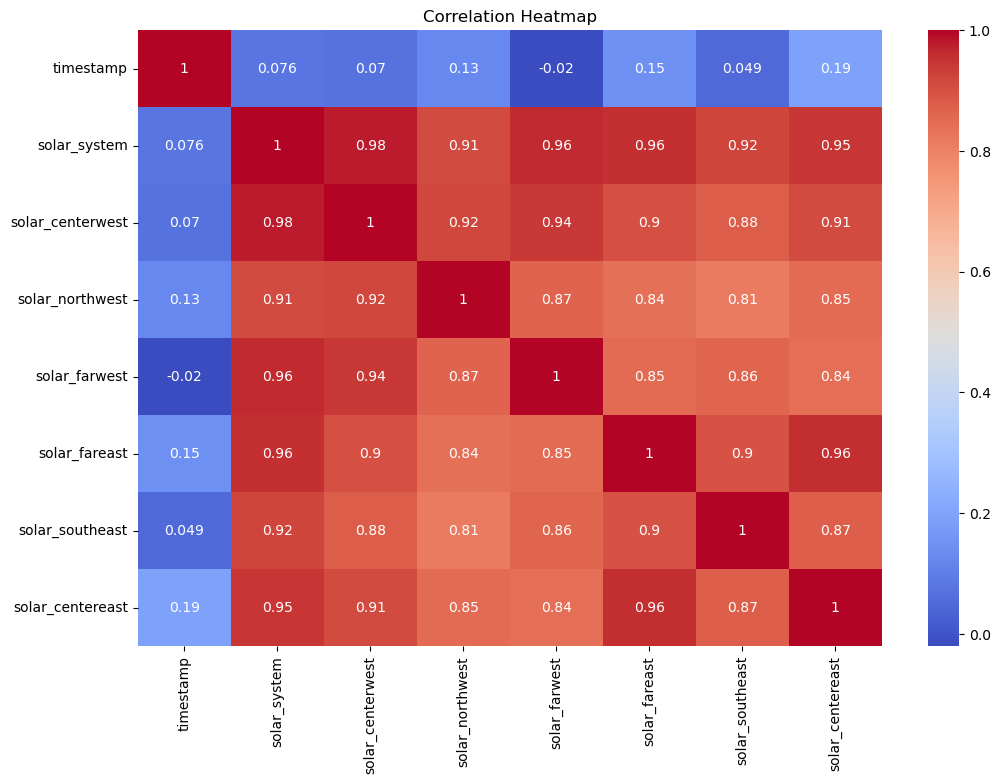

In [75]:
# Set the size of the entire figure (width=12, height=8 inches)
plt.figure(figsize=(12, 8))

# Create a heatmap showing the correlation between numeric columns in the DataFrame
# - df.corr() calculates Pearson correlation between all pairs of numeric columns
# - annot=True shows the actual correlation values in the heatmap cells
# - cmap='coolwarm' sets the color scheme: blue for negative, red for positive correlations
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Add a title to the heatmap
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


### Scatter Plot 

A scatter plot is a type of data visualization that shows the relationship between two continuous variables by displaying them as points on a two-dimensional graph.

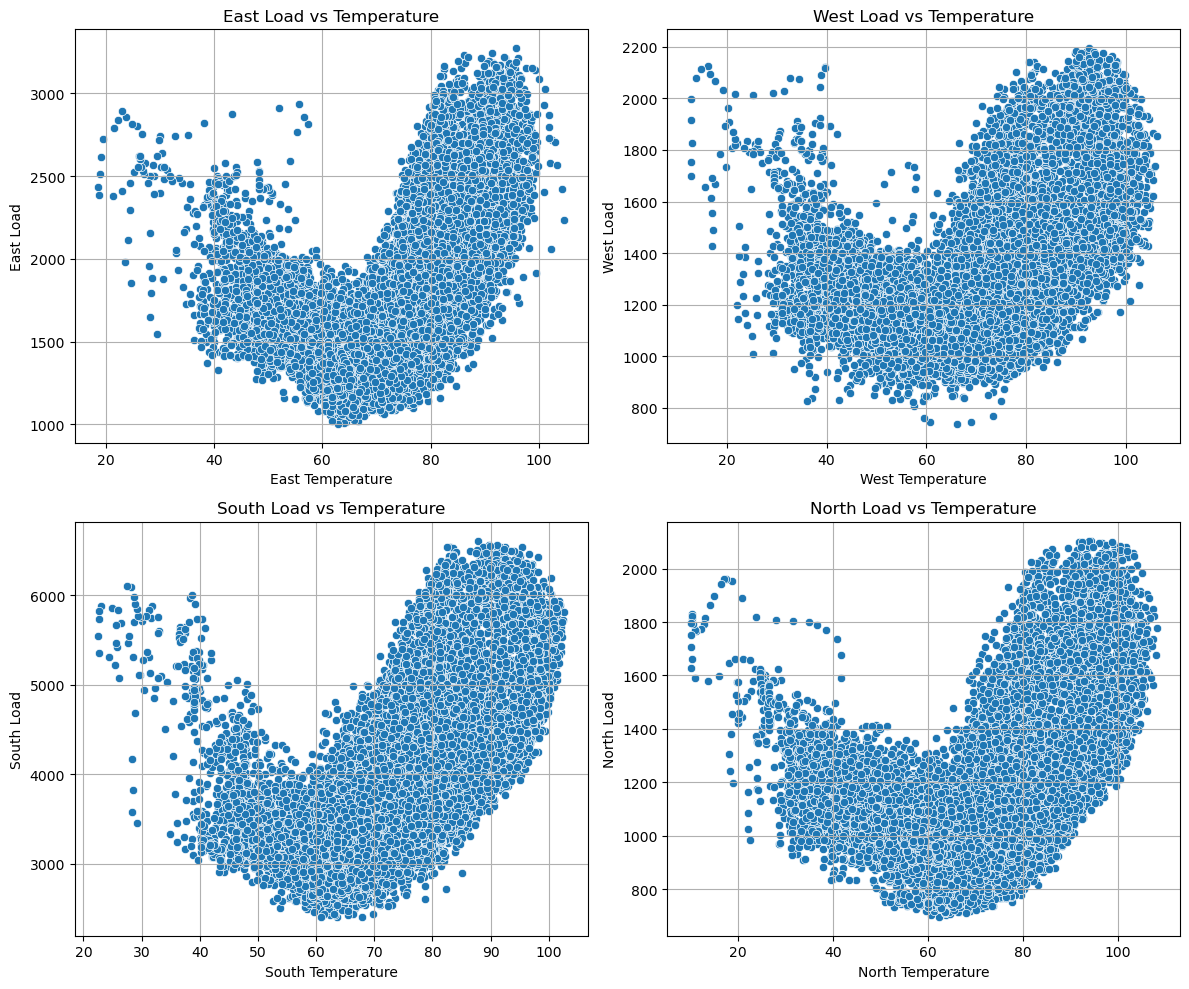

In [144]:
# Create a list of regions to compare loads and temperatures
regions = ['east', 'west', 'south', 'north']

# Create a scatter plot for each region comparing load to temperature
plt.figure(figsize=(12, 10))

for i, region in enumerate(regions, start=1):
    # Load for the region
    load_column = f'{region}_load'
    # Temperature for the region
    temp_column = f'temp_2m_{region}'
    
    plt.subplot(2, 2, i)  # 2x2 grid of plots
    sns.scatterplot(data=sdf, x=temp_column, y=load_column)
    plt.title(f'{region.capitalize()} Load vs Temperature')
    plt.xlabel(f'{region.capitalize()} Temperature')
    plt.ylabel(f'{region.capitalize()} Load')
    plt.grid(True)

plt.tight_layout()
plt.show()

### Box Plot

A box plot is a statistical chart used to visualize the distribution of a dataset. It shows the spread, central tendency, and presence of outliers in a compact form.

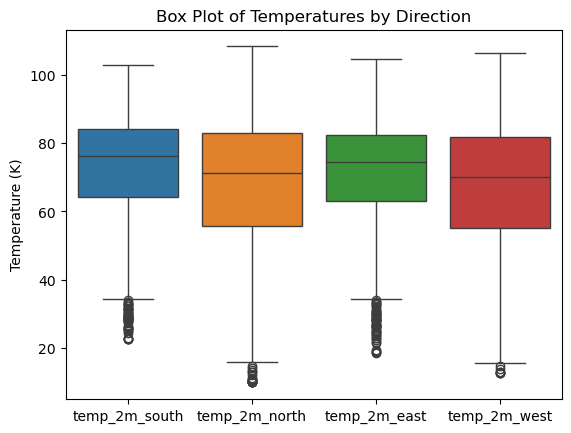

In [148]:
# Create a box plot to compare the distribution of temperatures from different directions
sns.boxplot(
    data=sdf[['temp_2m_south', 'temp_2m_north', 'temp_2m_east', 'temp_2m_west']]  # Select only the temperature columns by direction
)

# Set the title of the plot
plt.title('Box Plot of Temperatures by Direction')

# Label the y-axis to indicate the temperature scale
plt.ylabel('Temperature (K)')

# Display the plot
plt.show()

### Bar Plot

A bar plot is a type of graph that displays data using rectangular bars. The length or height of each bar represents the value associated with that category.

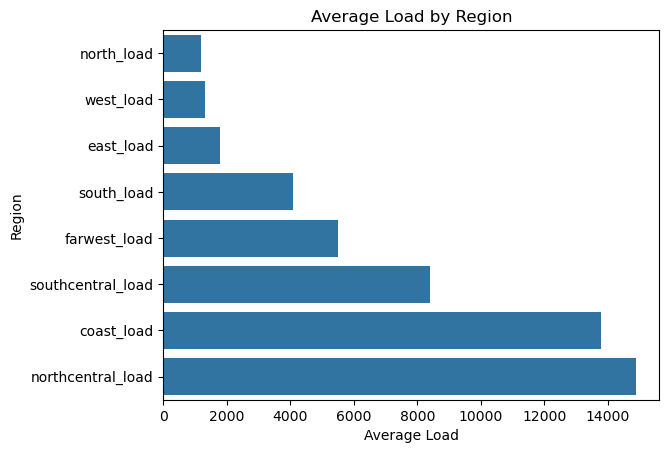

In [152]:
# Define a list of columns that represent the load for each region
load_cols = ['coast_load', 'east_load', 'farwest_load', 'north_load',
             'northcentral_load', 'south_load', 'southcentral_load', 'west_load']

# Calculate the mean (average) load for each region and sort them in ascending order
mean_loads = sdf[load_cols].mean().sort_values()

# Create a horizontal bar plot showing the average load for each region
sns.barplot(x=mean_loads.values, y=mean_loads.index)  # x=mean values, y=region names

# Add a title to the plot
plt.title('Average Load by Region')

# Label the x-axis
plt.xlabel('Average Load')

# Label the y-axis
plt.ylabel('Region')

# Display the plot
plt.show()

### Histogram

A histogram is a type of chart that shows the distribution of a continuous variable by grouping the data into bins (intervals) and displaying the frequency of values that fall into each bin.

It helps you understand how your data is spread out.

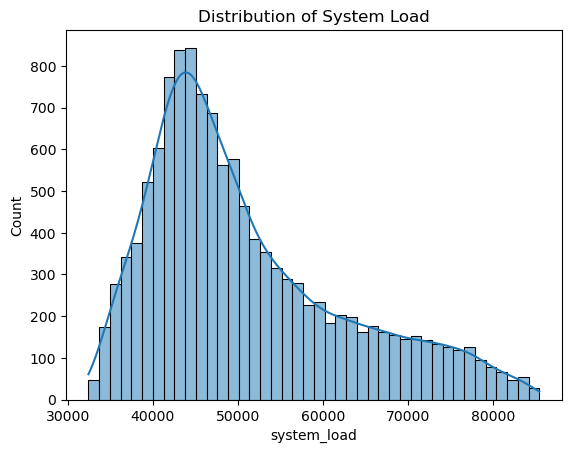

In [159]:
# Create a histogram of the 'system_load' column with a KDE (density) curve
sns.histplot(data=sdf, x='system_load', kde=True)

# Add a title to the plot
plt.title('Distribution of System Load')

# Display the plot
plt.show()

### Line Plot

A line plot is a type of graph that shows how a numeric value changes over time (or another continuous variable). It connects individual data points with a continuous line, making it easy to see trends or patterns.

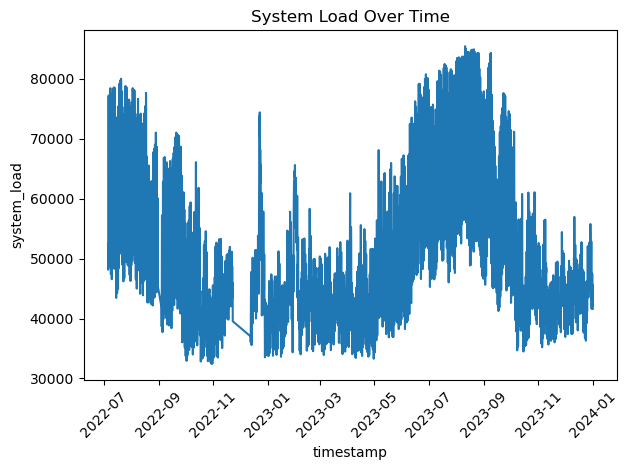

In [162]:
# Convert the 'timestamp' column to datetime format for accurate time-based plotting
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a line plot of system load over time
sns.lineplot(data=sdf, x='timestamp', y='system_load')

# Add a title to the plot
plt.title('System Load Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

## Clustering Daily/Weekly Regional Generation Profiles (K Means)

- Aggregate hourly data into daily or weekly profiles
- Normalize to compare patterns, not just scale
- Apply clustering  KMeans)
- Visualize clusters and profiles